# *Introduction*

The topic of this final project is to test the differences between two different regression models in order to see which model is best suited for this specific dataset.

The dataset that was chosen is the California Housing Dataset from sckit-learn datasets.

The two models that were chosen were the decision tree regresional model aswellas the nueral network MLPRegressor. Both of these models will be compared with the standard sckit-learn Linear regression model to see how decisions trees and using a nueral network for regression changes the results.

Much credit and thanks is due to the documentation of the models which was used to build and test the models. The following websites were used in the creation of this model

-https://scikit-learn.org/stable/modules/tree.html#regression

-https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

-https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

-https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

The Project was also setup using guidelines and following a similar procedure form Assignment 3 of CS345


# Setup

In [282]:

import pandas
import numpy
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

# Loading the Dataset

In [283]:

data = sklearn.datasets.fetch_california_housing(as_frame = True)
print(data.frame.head())

   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]


### Finding Correlation from Datset

In [284]:

data.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### Plotting Features

### Splitting Data into training and testing single variable with highest correlation

In [285]:

y = data.frame["MedHouseVal"].values * 1000
X = data.frame["MedInc"].values
yint = y.astype('int')

# Setup ML Models

### Setting up base model

In [286]:

linear = LinearRegression()

### Setting up NN model

In [287]:

clf = MLPClassifier(hidden_layer_sizes=(5,2),
                    activation = 'relu',
                    solver='adam',
                    alpha = 1e-5)

### Setting up Regression Decision Tree 

In [288]:

clftree = tree.DecisionTreeRegressor()

# Executing the models on a single variable

### Fitting the Linear model

In [289]:
linear.fit(np.reshape(X, (-1,1)),y)

LinearRegression()

### Fitting the NN Regression model

In [290]:

clf.fit(np.reshape(X, (-1,1)),yint)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2))

### Fiting Tree Regression Model

In [291]:

clftree.fit(np.reshape(X, (-1,1)),y)

DecisionTreeRegressor()

### Plotting Regression Results

In [292]:
#@title
def plot_regression_result_1(X, y, lr, xlabel) :
  predicted = lr.predict(X)
  print("The root mean squared error is: \t{:4.2f}".format(mean_squared_error(y, predicted)))
  print("the mean absolute error is: \t\t{:4.2f}".format(mean_absolute_error(y,predicted)))
  print("The Coefficients are: ")
  print(np.around(X, decimals = 2))
  print("The Intercepts are :")
  print(np.around(y, decimals= 2))
  title = 'Regression result: RMSE {:4.2f} MAE {:4.2f}'.format( mean_squared_error(y, predicted), mean_absolute_error(y,predicted))
  plt.figure(figsize=(12,5))
  plt.scatter(X,y, c ='darkred')
  plt.scatter(X,predicted, c = 'darkgreen')
  plt.ylabel('MedHouseVal')
  plt.xlabel(xlabel)
  plt.title(title)

### Scatterplot of Linear

The root mean squared error is: 	701131.15
the mean absolute error is: 		626.26
The Coefficients are: 
[[8.33]
 [8.3 ]
 [7.26]
 ...
 [1.7 ]
 [1.87]
 [2.39]]
The Intercepts are :
[4526. 3585. 3521. ...  923.  847.  894.]


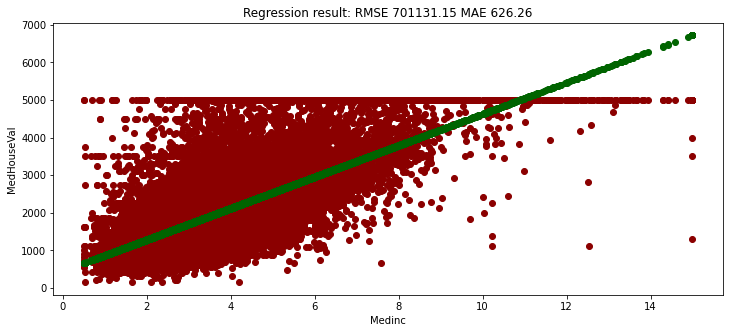

In [293]:
plot_regression_result_1(np.reshape(X, (-1,1)), y, linear, 'Medinc')

### Scatterplot of NN

The root mean squared error is: 	5784821.46
the mean absolute error is: 		1980.95
The Coefficients are: 
[[8.33]
 [8.3 ]
 [7.26]
 ...
 [1.7 ]
 [1.87]
 [2.39]]
The Intercepts are :
[4526 3585 3521 ...  923  847  894]


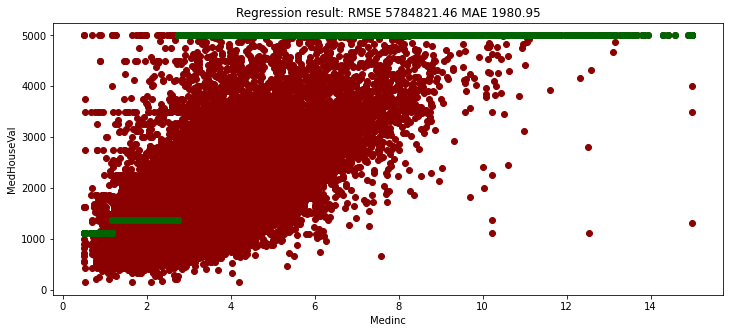

In [294]:

plot_regression_result_1(np.reshape(X, (-1,1)), yint, clf, 'Medinc')

### Scatterplot of Tree Regression

The root mean squared error is: 	249351.87
the mean absolute error is: 		265.40
The Coefficients are: 
[[8.33]
 [8.3 ]
 [7.26]
 ...
 [1.7 ]
 [1.87]
 [2.39]]
The Intercepts are :
[4526. 3585. 3521. ...  923.  847.  894.]


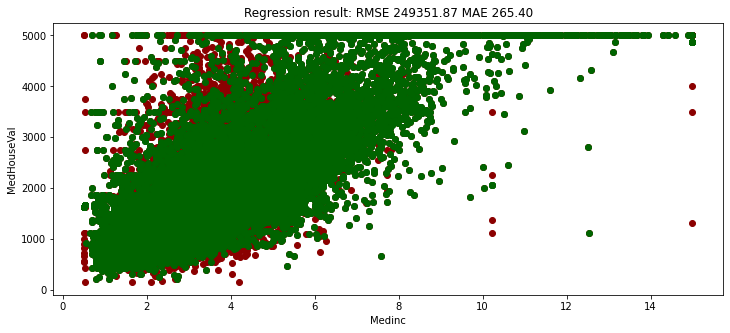

In [295]:

plot_regression_result_1(np.reshape(X, (-1,1)), y, clftree, 'Medinc')

### Accuracy of Models with single Variables 

In [296]:

def accuracy(lr, X, y):
  accalr = np.sum( abs((lr.predict(X) / y) - 1) <= .02 )/y.shape[0]
  print(f'Regression classification accurracy on MedInc: \t{accalr:5.2f}')

In [297]:

accuracy(linear,np.reshape(X, (-1,1)),y)
accuracy(clf,np.reshape(X, (-1,1)),yint)
accuracy(clftree,np.reshape(X, (-1,1)),y)

Regression classification accurracy on MedInc: 	 0.04
Regression classification accurracy on MedInc: 	 0.06
Regression classification accurracy on MedInc: 	 0.50


# Fitting with all features

In [298]:

Xall = data.frame[["MedInc",
                "HouseAge",
                "AveRooms",
                "AveBedrms",
                "Population",
                "AveOccup",
                "Latitude",
                "Longitude"]].values


### Creating two new models for testing all variables

In [299]:
linear_two = LinearRegression()

In [300]:

clf_two = MLPClassifier(hidden_layer_sizes=(5,2),
                    activation = 'relu',
                    solver='adam',
                    alpha = 1e-5)

In [301]:

clftree_two = tree.DecisionTreeRegressor()

### Fitting both models

In [302]:
linear_two.fit(Xall,yint)

LinearRegression()

In [303]:

clf_two.fit(Xall,yint)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2))

In [304]:

clftree_two.fit(Xall,y)

DecisionTreeRegressor()

# RMSE and MSE of both models

In [305]:

def regression_results(lr, X, y) :
  predicted = lr.predict(X)
  print("The root mean squared error is: \t{:4.2f}".format(mean_squared_error(y, predicted)))
  print("the mean absolute error is: \t\t{:4.2f}".format(mean_absolute_error(y,predicted)))
  print("The Coefficients are: ")
  print(np.around(X, decimals = 2))
  print("The Intercepts are :")
  print(np.around(y, decimals= 2))

### Results for NN model

In [306]:
regression_results(linear_two, Xall, y)

The root mean squared error is: 	524320.99
the mean absolute error is: 		531.16
The Coefficients are: 
[[   8.33   41.      6.98 ...    2.56   37.88 -122.23]
 [   8.3    21.      6.24 ...    2.11   37.86 -122.22]
 [   7.26   52.      8.29 ...    2.8    37.85 -122.24]
 ...
 [   1.7    17.      5.21 ...    2.33   39.43 -121.22]
 [   1.87   18.      5.33 ...    2.12   39.43 -121.32]
 [   2.39   16.      5.25 ...    2.62   39.37 -121.24]]
The Intercepts are :
[4526. 3585. 3521. ...  923.  847.  894.]


In [307]:

regression_results(clf_two, Xall, yint)

The root mean squared error is: 	3602390.30
the mean absolute error is: 		1464.42
The Coefficients are: 
[[   8.33   41.      6.98 ...    2.56   37.88 -122.23]
 [   8.3    21.      6.24 ...    2.11   37.86 -122.22]
 [   7.26   52.      8.29 ...    2.8    37.85 -122.24]
 ...
 [   1.7    17.      5.21 ...    2.33   39.43 -121.22]
 [   1.87   18.      5.33 ...    2.12   39.43 -121.32]
 [   2.39   16.      5.25 ...    2.62   39.37 -121.24]]
The Intercepts are :
[4526 3585 3521 ...  923  847  894]


### Results for Tree model

In [308]:

regression_results(clftree_two, Xall, y)

The root mean squared error is: 	0.00
the mean absolute error is: 		0.00
The Coefficients are: 
[[   8.33   41.      6.98 ...    2.56   37.88 -122.23]
 [   8.3    21.      6.24 ...    2.11   37.86 -122.22]
 [   7.26   52.      8.29 ...    2.8    37.85 -122.24]
 ...
 [   1.7    17.      5.21 ...    2.33   39.43 -121.22]
 [   1.87   18.      5.33 ...    2.12   39.43 -121.32]
 [   2.39   16.      5.25 ...    2.62   39.37 -121.24]]
The Intercepts are :
[4526. 3585. 3521. ...  923.  847.  894.]


In [310]:

def accuracy_all(lr, X, y):
  accalr = np.sum( abs((lr.predict(X) / y) - 1) <= .02 )/y.shape[0]
  print(f'Regression classification accurracy on All features: \t{accalr:5.2f}')

In [311]:

accuracy_all(linear_two, Xall, y)
accuracy_all(clf_two, Xall, y)
accuracy_all(clftree_two, Xall, y)

Regression classification accurracy on All features: 	 0.05
Regression classification accurracy on All features: 	 0.07
Regression classification accurracy on All features: 	 1.00


# Testing generalization

### Splitting data into two sets

In [312]:

X_train, X_test, y_train, y_test = train_test_split(Xall, y, test_size=0.8)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(Xall, y, test_size=0.8)
y_train = y_train * 1000
y_test = y_test * 1000
y_train_int = y_train.astype('int')
y_test_int = y_train.astype



### Creating new models

In [313]:
linear_three = LinearRegression()

In [314]:

clf_three = MLPClassifier(hidden_layer_sizes=(5,2),
                    activation = 'relu',
                    solver='adam',
                    alpha = 1e-5)


In [315]:

clftree_three = tree.DecisionTreeRegressor()

### Fitting new models

In [316]:
linear_three.fit(X_train, y_train)

LinearRegression()

In [317]:

clf_three.fit(X_train, y_train_int)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2))

In [318]:

clftree_three.fit(X_train, y_train)

DecisionTreeRegressor()

### RMSE and MSE of both models on training set

In [319]:
regression_results(linear_three, X_train, y_train)

The root mean squared error is: 	469322091805.07
the mean absolute error is: 		499913.73
The Coefficients are: 
[[   4.47   13.      6.97 ...    2.8    35.6  -120.6 ]
 [   3.56   37.      4.93 ...    2.83   34.26 -118.3 ]
 [   4.81   36.      4.76 ...    1.99   37.98 -122.56]
 ...
 [   3.6    21.      5.39 ...    2.66   37.74 -121.13]
 [   2.15   31.      2.35 ...    4.27   34.04 -118.29]
 [   1.47   12.      5.25 ...    3.34   36.98 -120.06]]
The Intercepts are :
[2069000. 1845000. 3457000. ... 1346000. 1281000.  604000.]


In [320]:

regression_results(clf_three, X_train, y_train_int)

The root mean squared error is: 	10046356645972.65
the mean absolute error is: 		2962592.20
The Coefficients are: 
[[   4.47   13.      6.97 ...    2.8    35.6  -120.6 ]
 [   3.56   37.      4.93 ...    2.83   34.26 -118.3 ]
 [   4.81   36.      4.76 ...    1.99   37.98 -122.56]
 ...
 [   3.6    21.      5.39 ...    2.66   37.74 -121.13]
 [   2.15   31.      2.35 ...    4.27   34.04 -118.29]
 [   1.47   12.      5.25 ...    3.34   36.98 -120.06]]
The Intercepts are :
[2069000 1845000 3457000 ... 1346000 1281000  604000]


In [321]:

regression_results(clftree_three, X_train, y_train)

The root mean squared error is: 	0.00
the mean absolute error is: 		0.00
The Coefficients are: 
[[   4.47   13.      6.97 ...    2.8    35.6  -120.6 ]
 [   3.56   37.      4.93 ...    2.83   34.26 -118.3 ]
 [   4.81   36.      4.76 ...    1.99   37.98 -122.56]
 ...
 [   3.6    21.      5.39 ...    2.66   37.74 -121.13]
 [   2.15   31.      2.35 ...    4.27   34.04 -118.29]
 [   1.47   12.      5.25 ...    3.34   36.98 -120.06]]
The Intercepts are :
[2069000. 1845000. 3457000. ... 1346000. 1281000.  604000.]


### Accuracy on Testing set

In [322]:

accuracy_all(linear_three, X_test, y_test)
accuracy_all(clf_three, X_test, y_test)
accuracy_all(clftree_three, X_test, y_test)

Regression classification accurracy on All features: 	 0.05
Regression classification accurracy on All features: 	 0.05
Regression classification accurracy on All features: 	 0.09


### Testing if overfitting is caused by data distrubution

In [328]:
from numpy.random import default_rng
rng = default_rng(seed = 42)
Xall_shuffle = rng.shuffle(Xall)
y_shuffle = rng.shuffle(y)
# print(y_shuffle)

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(Xall, y, test_size=0.8)
# print(X_train_random)




In [329]:

clftree_random = tree.DecisionTreeRegressor()

In [330]:
clftree_random.fit(X_train, y_train)

DecisionTreeRegressor()

In [332]:
regression_results(clftree_random, X_train, y_train)

The root mean squared error is: 	0.00
the mean absolute error is: 		0.00
The Coefficients are: 
[[   4.47   13.      6.97 ...    2.8    35.6  -120.6 ]
 [   3.56   37.      4.93 ...    2.83   34.26 -118.3 ]
 [   4.81   36.      4.76 ...    1.99   37.98 -122.56]
 ...
 [   3.6    21.      5.39 ...    2.66   37.74 -121.13]
 [   2.15   31.      2.35 ...    4.27   34.04 -118.29]
 [   1.47   12.      5.25 ...    3.34   36.98 -120.06]]
The Intercepts are :
[2069000. 1845000. 3457000. ... 1346000. 1281000.  604000.]


In [333]:
accuracy_all(clftree_three, X_test, y_test)

Regression classification accurracy on All features: 	 0.09


# Conclusions/Observations

There are a few things that can be drawn from this notebook in particular for this dataset we can see that see that neither of the three models are very well suited for generalization. 

Particulaly we are able to see when fitting with only the variable which contains the highest correlation to Average house price the the decision Tree regresional model performs the best and has the lowest RMSE aswell as MAE. From visual ques this is also very clear that it performs the best in fitting the data and then predicting as it also achieves the highest accuracy. while the Linear model and the Nueral Network Linear model both struggle. 

Looking at when the model is fitting with all of the data not just the highest correlation we see that fitting the model with more data improves the overall accuracy of all three of the models. However in this case something that is important to note is the the Regressional Decision tree model achieves a perfect accuracy. Initially when creating this notebook this caught me off gaurd as i did not expect to reach a perfect accuracy. 

However when testing to see the generalization capability of all three models we find that the Regressional Decision tree that the accuracy of the model drops drastically, indicating that this was due to overfitting to the data rather than having strong generalization capabilites. Though the poor generalization of the models may not due to be poor generalization, but rather to the dataset which was used to fit the model. 

Something that I had noticed with the dataset is that the values descend from highest median house value to lowest median house value. This meant that when the Data was partitioned into two sets one for training and the other for testing the model was never fitted with data which included the lower end of the spectrum of house value. This also meant that the data was asked to predict on Data which it had very little examples to base its decision on. For this reason I Believe that accuracy for all models could be potentially increased in generalization but randomly shuffling the input data in order to expose the models to a larger variety of data. 

Though when this was tested it was found that the model was unable to perform better. While the model steal acheived a perfect accuracy when fitting from the shuffled data the overal generalization accuracy was the same. Though I do want to note this may be due to the shuffling moving values around and not matching them with the appropriate Y value or median house value.

Another thing which i found interesting about all three of the models is that the coeefficients and the intercepts which the model generated from being fitted were all the same across the three different models.
Indicating that the different results came from the models using that information in different forms in order to result in different outputs. 